# Employee Attrition Prediction

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
data.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1, inplace=True)

##### these columns have same values and these columns do not help in prediction 

In [20]:
le = LabelEncoder()
for col in data.select_dtypes(include='object'):
    data[col] = le.fit_transform(data[col])

##### LabelEncoder converts text into number

In [10]:
X= data.drop("Attrition", axis=1)
y = data["Attrition"]

##### X (features) = employee details (age, salary, job role, etc.)

##### y (target) = Attrition (employee leaves or stays)

In [12]:
X_train, X_test, y_train, y_test= train_test_split(
    X,y ,test_size=0.2, random_state=42
)

##### 80% data for  training the model

##### 20% data for testing the model

In [14]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

##### I trained the Random Forest model using the training dataset to learn employee attrition patterns.

In [15]:
y_pred = model.predict(X_test)

In [16]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy : 0.8809523809523809
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       0.83      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.86      0.56      0.58       294
weighted avg       0.88      0.88      0.84       294



#### model achieved an accuracy of approximately 88%
#### 0 means employee stays and 1 means employee leaves

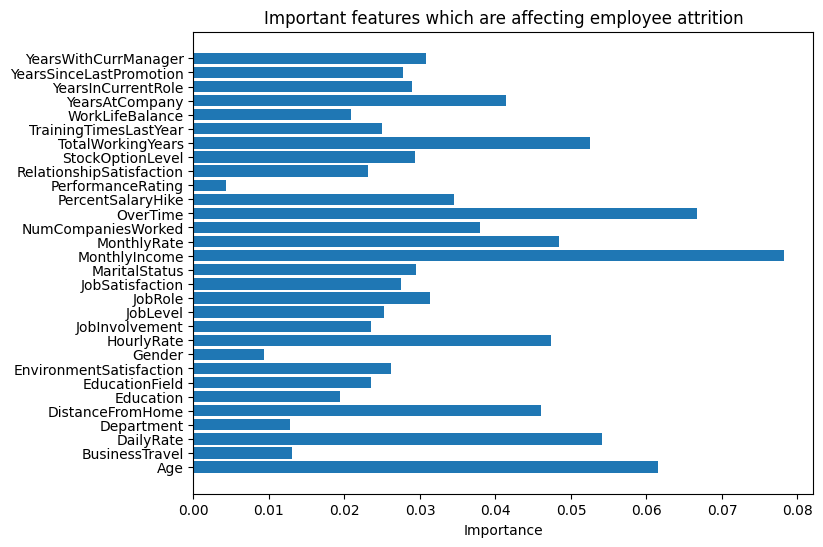

In [25]:
importance = model.feature_importances_
features = X.columns
plt.figure(figsize= (8,6))
plt.barh(features , importance)
plt.xlabel("Importance")
plt.title("Important features which are affecting employee attrition")
plt.show()

#### Employee attrition is mainly driven by salary, overtime, age, experience, and work-life balance, while demographic factors like gender and education have less impact.

## Conclusion
#### A Random Forest model was used to predict employee attrition with an accuracy of about 88%.
#### The analysis showed that income, overtime, age, work-life balance, and experience are the most important factors affecting employee turnover.
#### This project demonstrates how machine learning can help organizations understand and reduce employee attrition.